In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("dataset.csv")

# Show first rows
df.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


In [2]:
df.shape

(9994, 19)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   int64  
 17  sales          9994 non-null   float64
 18  profit_m

In [4]:
df.describe()

,zip,discount,profit,quantity,sales,profit_margin
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.371723,0.156203,28.656896,3.789574,229.858001,0.120314
std,32063.705315,0.206452,234.260108,2.225110,623.245101,0.466754
min,1040.000000,0.000000,-6599.978000,1.000000,0.444000,-2.750000
25%,23223.000000,0.000000,1.728750,2.000000,17.280000,0.075000
50%,56430.500000,0.200000,8.666500,3.000000,54.490000,0.270000
75%,90008.000000,0.200000,29.364000,5.000000,209.940000,0.362500
max,99301.000000,0.800000,8399.976000,14.000000,22638.480000,0.500000


In [5]:
df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
customer,0
manufactory,0
product_name,0
segment,0
category,0
subcategory,0
region,0


In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['order_id', 'order_date', 'ship_date', 'customer', 'manufactory',
       'product_name', 'segment', 'category', 'subcategory', 'region', 'zip',
       'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales',
       'profit_margin'],
      dtype='object')

In [10]:
df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
customer,0
manufactory,0
product_name,0
segment,0
category,0
subcategory,0
region,0


In [11]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'customer', 'manufactory',
       'product_name', 'segment', 'category', 'subcategory', 'region', 'zip',
       'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales',
       'profit_margin'],
      dtype='object')

In [12]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [13]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()

In [14]:
print("Total Sales:", df['sales'].sum())
print("Total Profit:", df['profit'].sum())

Total Sales: 2296919.4883
Total Profit: 286409.08050000004


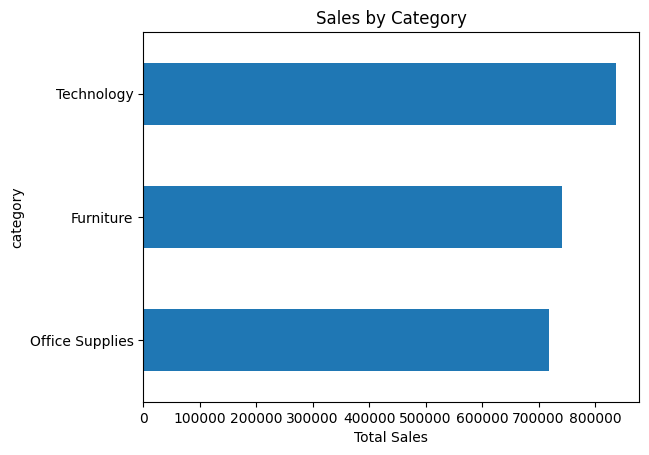

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_by_category = df.groupby('category')['sales'].sum().sort_values()

sales_by_category.plot(kind='barh')
plt.title("Sales by Category")
plt.xlabel("Total Sales")
plt.show()

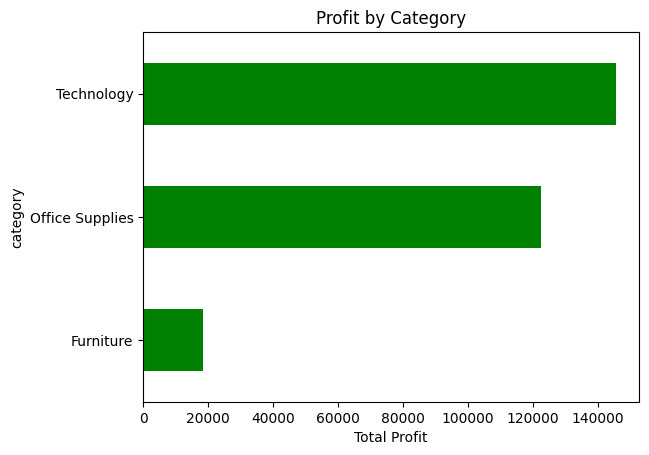

In [16]:
profit_by_category = df.groupby('category')['profit'].sum().sort_values()

profit_by_category.plot(kind='barh', color='green')
plt.title("Profit by Category")
plt.xlabel("Total Profit")
plt.show()

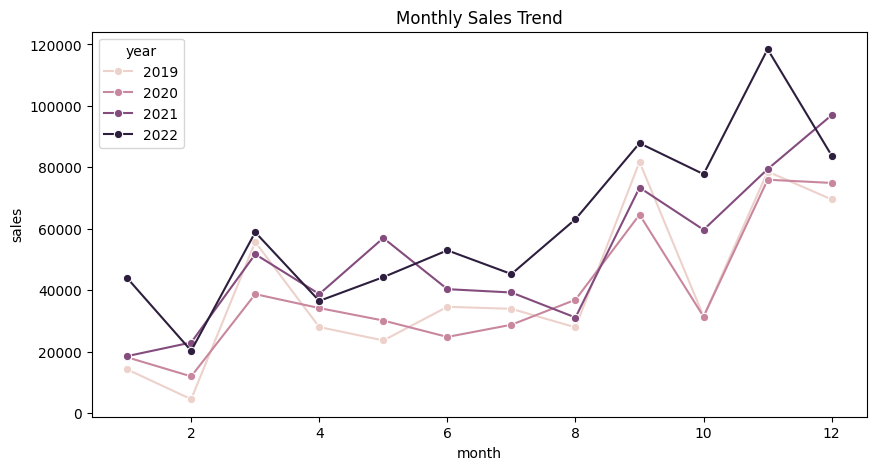

In [17]:
monthly_sales = df.groupby(['year','month'])['sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', marker='o')

plt.title("Monthly Sales Trend")
plt.show()

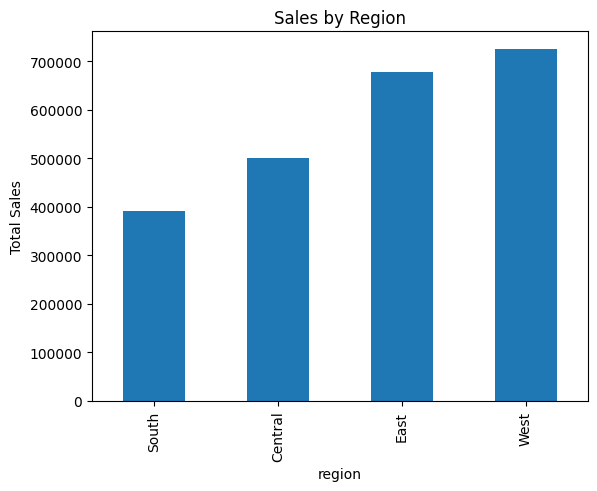

In [18]:
region_sales = df.groupby('region')['sales'].sum().sort_values()

region_sales.plot(kind='bar')
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.show()

In [19]:
print("Total Sales:", df['sales'].sum())
print("Total Profit:", df['profit'].sum())
print("Total Orders:", df['order_id'].nunique())

Total Sales: 2296919.4883
Total Profit: 286409.08050000004
Total Orders: 5009


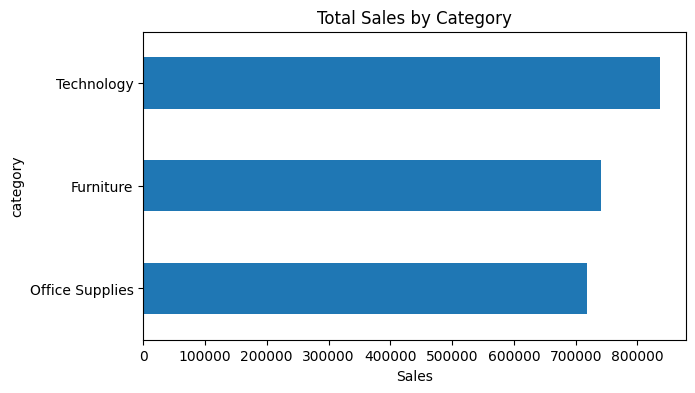

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_cat = df.groupby('category')['sales'].sum().sort_values()

plt.figure(figsize=(7,4))
sales_cat.plot(kind='barh')
plt.title("Total Sales by Category")
plt.xlabel("Sales")
plt.show()

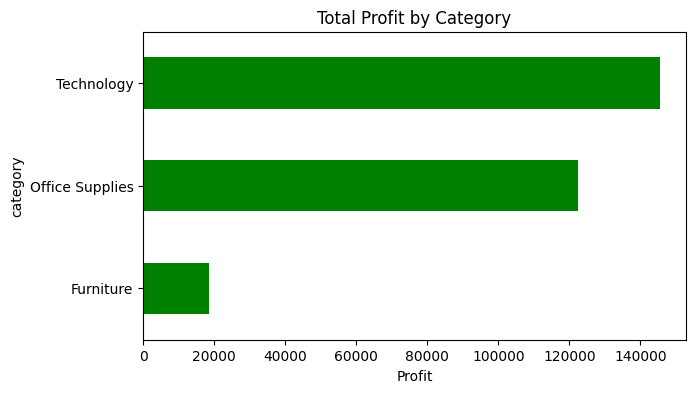

In [21]:
profit_cat = df.groupby('category')['profit'].sum().sort_values()

plt.figure(figsize=(7,4))
profit_cat.plot(kind='barh', color='green')
plt.title("Total Profit by Category")
plt.xlabel("Profit")
plt.show()

In [23]:
df.columns


Index(['order_id', 'order_date', 'ship_date', 'customer', 'manufactory',
       'product_name', 'segment', 'category', 'subcategory', 'region', 'zip',
       'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales',
       'profit_margin', 'year', 'month', 'month_name'],
      dtype='object')

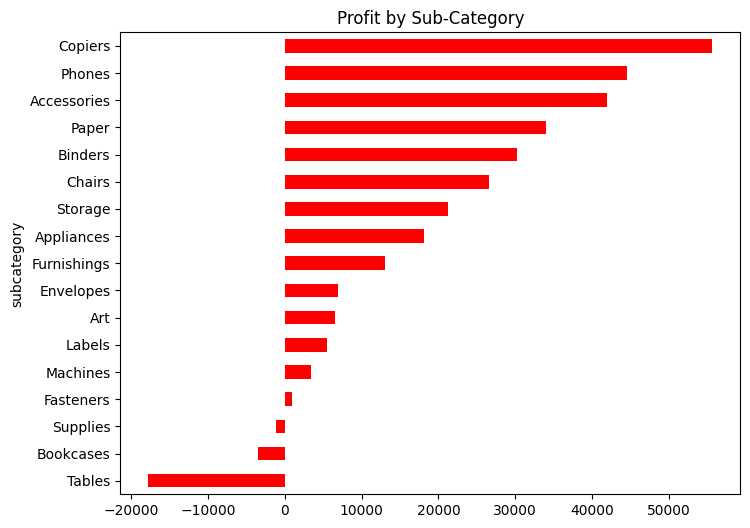

In [24]:
profit_sub = df.groupby('subcategory')['profit'].sum().sort_values()

plt.figure(figsize=(8,6))
profit_sub.plot(kind='barh', color='red')
plt.title("Profit by Sub-Category")
plt.show()

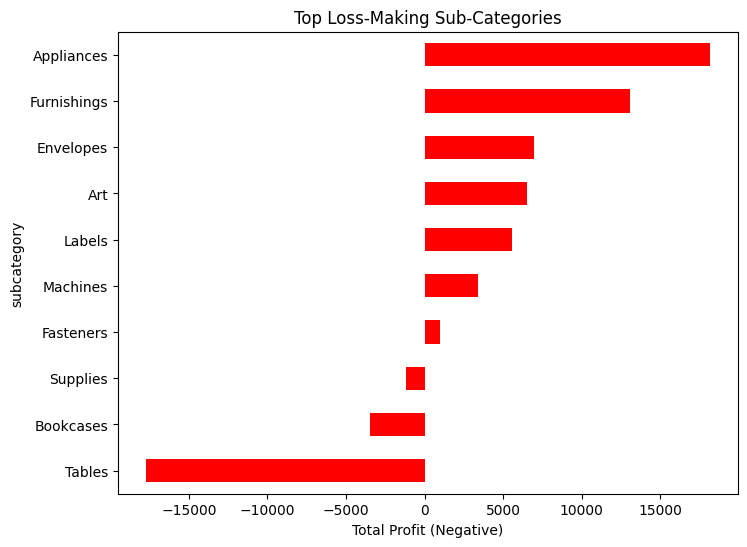

In [26]:
loss_sub = df.groupby('subcategory')['profit'].sum().sort_values().head(10)

plt.figure(figsize=(8,6))
loss_sub.plot(kind='barh', color='red')
plt.title("Top Loss-Making Sub-Categories")
plt.xlabel("Total Profit (Negative)")
plt.show()

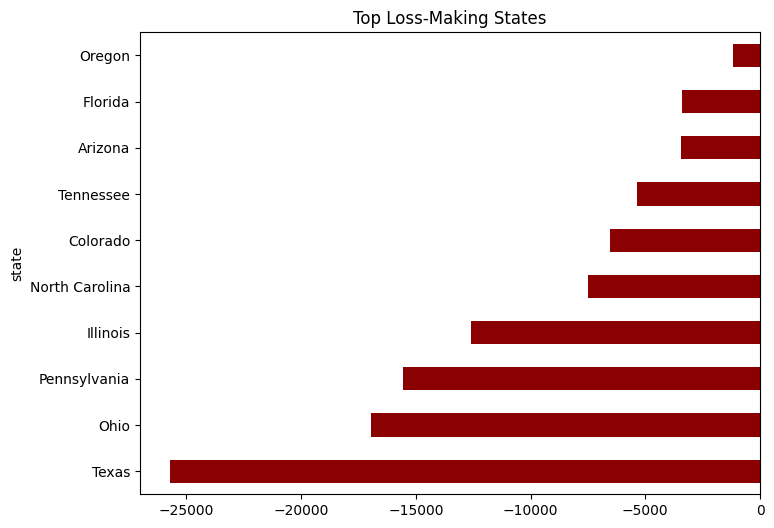

In [27]:
loss_states = df.groupby('state')['profit'].sum().sort_values().head(10)

plt.figure(figsize=(8,6))
loss_states.plot(kind='barh', color='darkred')
plt.title("Top Loss-Making States")
plt.show()

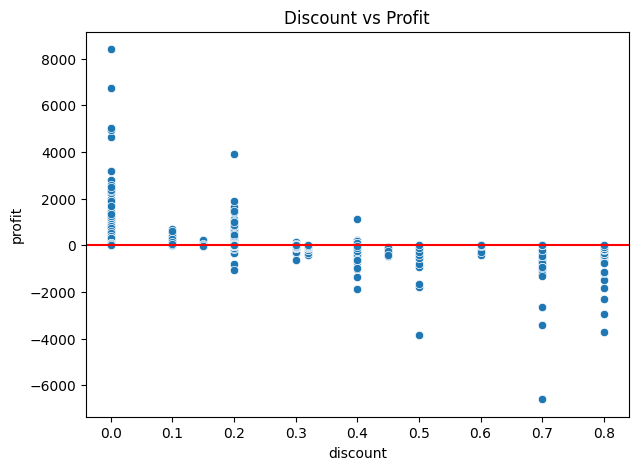

In [28]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='discount', y='profit')
plt.axhline(0, color='red')
plt.title("Discount vs Profit")
plt.show()

In [29]:
df[['discount','profit']].corr()

,discount,profit
discount,1.000000,-0.219481
profit,-0.219481,1.000000


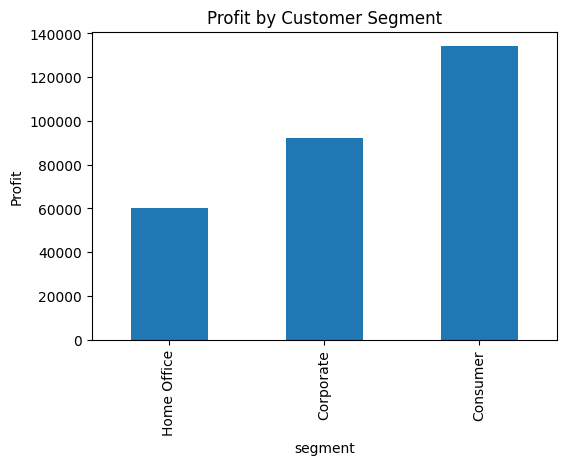

In [30]:
segment_profit = df.groupby('segment')['profit'].sum().sort_values()

segment_profit.plot(kind='bar', figsize=(6,4))
plt.title("Profit by Customer Segment")
plt.ylabel("Profit")
plt.show()

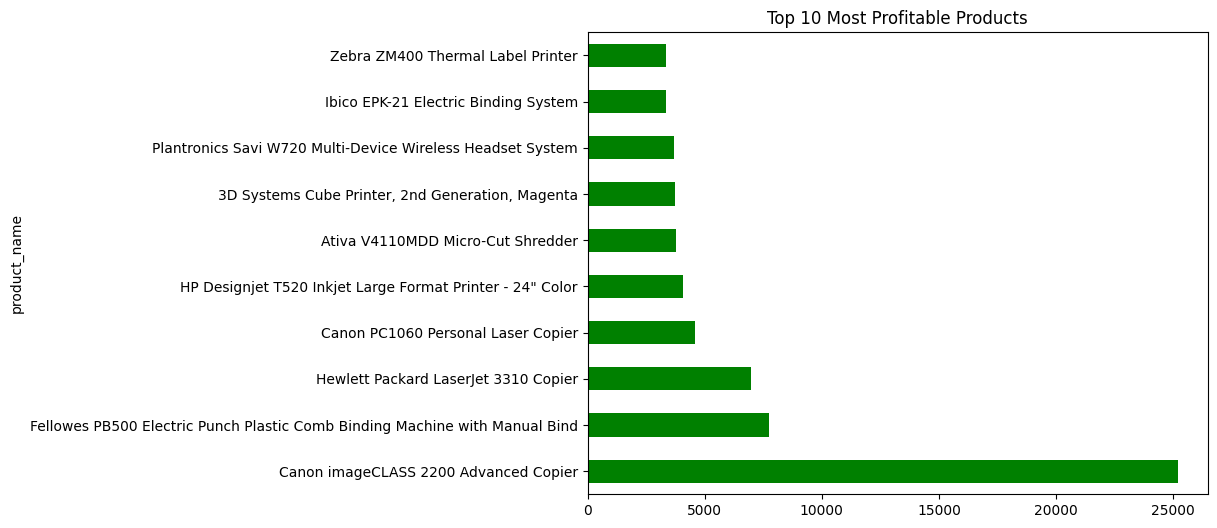

In [31]:
top_products = df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', figsize=(8,6), color='green')
plt.title("Top 10 Most Profitable Products")
plt.show()

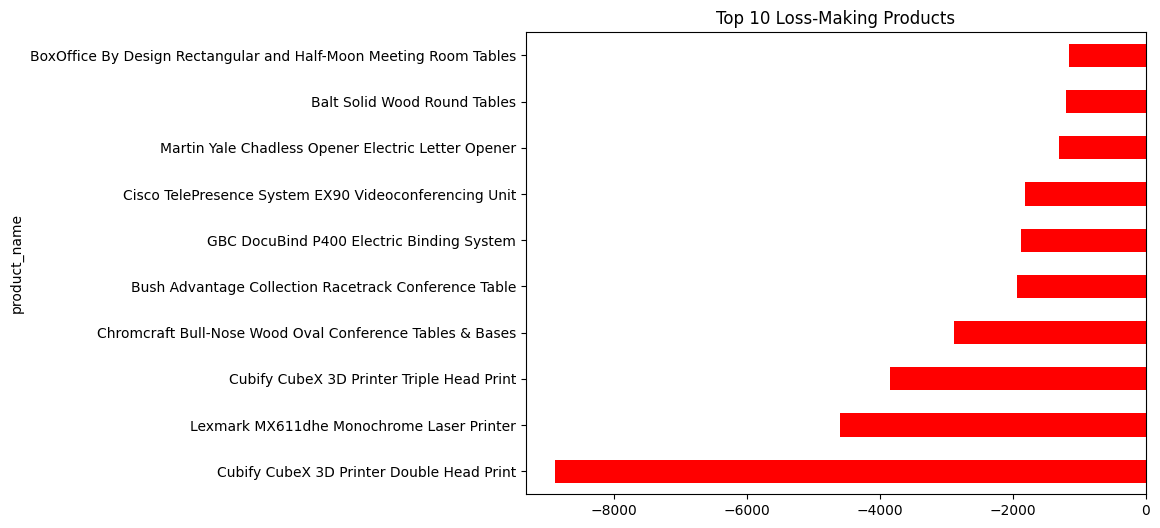

In [32]:
worst_products = df.groupby('product_name')['profit'].sum().sort_values().head(10)

worst_products.plot(kind='barh', figsize=(8,6), color='red')
plt.title("Top 10 Loss-Making Products")
plt.show()

In [33]:
df['ship_days'] = (df['ship_date'] - df['order_date']).dt.days

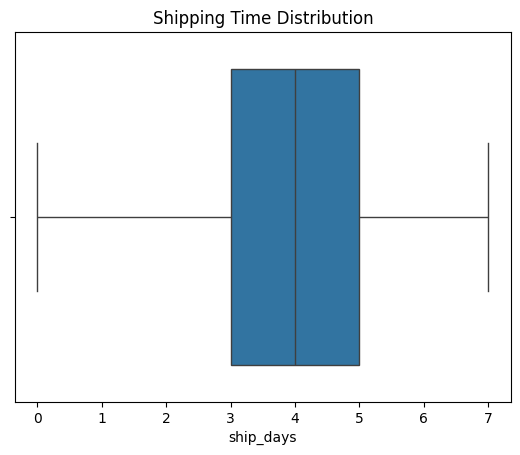

In [34]:
sns.boxplot(data=df, x='ship_days')
plt.title("Shipping Time Distribution")
plt.show()

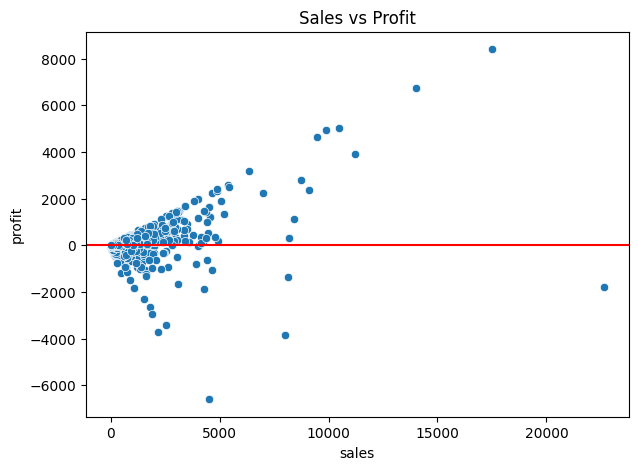

In [35]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='sales', y='profit')
plt.axhline(0, color='red')
plt.title("Sales vs Profit")
plt.show()

In [36]:
df['profit_margin'] = df['profit'] / df['sales']

In [37]:
df.groupby('category')['profit_margin'].mean()

,profit_margin
category,
Furniture,0.038822
Office Supplies,0.138030
Technology,0.156138
